# Przetwarzanie sygnałów

## Zadanie 1

#### a) Przeanalizuj poniższy skrypt

In [24]:
from pylab import *
from numpy import *
import math
from ipywidgets import *

def plot_fft(A=1, w=40, LP=1, F=2.0):
  #--- Definiujemy sygnal wejsciowy
  # A = 1        # Amplituda sygnalu
  # F = 2.0      # Czestotliwosc sygnalu [Hz]
  T = 1/F      # Okres sygnalu [s]
  f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

  #--- Probkujemy sygnal
  # LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
  # w = 40       # Częstotliwość probkowania [Hz]
  TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

  t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
  n = len(t)                 # Liczba próbek

  signal = f(t)

  #--- Rysujemy sygnał (niebieskie kółka)
  fig = plt.figure(figsize=(15, 6), dpi=80)
  ax = fig.add_subplot(121)
  ax.plot(t, signal, 'o')


  plt.xlabel("Częstotliwość Hz")
  plt.ylabel("Wartość")

  #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
  base_t = np.arange(0, LP * T, 1/200)
  base_signal = f(base_t)
  ax.plot(base_t, base_signal, linestyle='-', color='red')
  ax.set_ylim([min(base_signal), max(base_signal)])

  #--- Wykonujemy FFT
  signal1 = 2 * fft.fft(signal)/n
  signal1 = abs(signal1) # moduł

  #--- Rysujemy FFT
  ax = fig.add_subplot(122)
  ymax = max(signal1)
  #ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

  freqs = np.linspace(0, w, n, endpoint=False)
  stem(freqs, signal1, '-*');

  plt.xlabel("Częstotliwość Hz")
  plt.ylabel("Amplituda")

  plt.show()

**UWAGA**: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [25]:
def prosta(a=2, b=0):
    x = np.linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)

    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    plt.show()

# interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
interact(plot_fft, A=(1, 10, 1), w=(1, 50, 1), LP=(1, 10, 1), F=(1, 10, 1))

interactive(children=(IntSlider(value=1, description='A', max=10, min=1), IntSlider(value=40, description='w',…

<function __main__.plot_fft(A=1, w=40, LP=1, F=2.0)>

#### b) Zmień częstotliwość próbkowania na 50Hz.

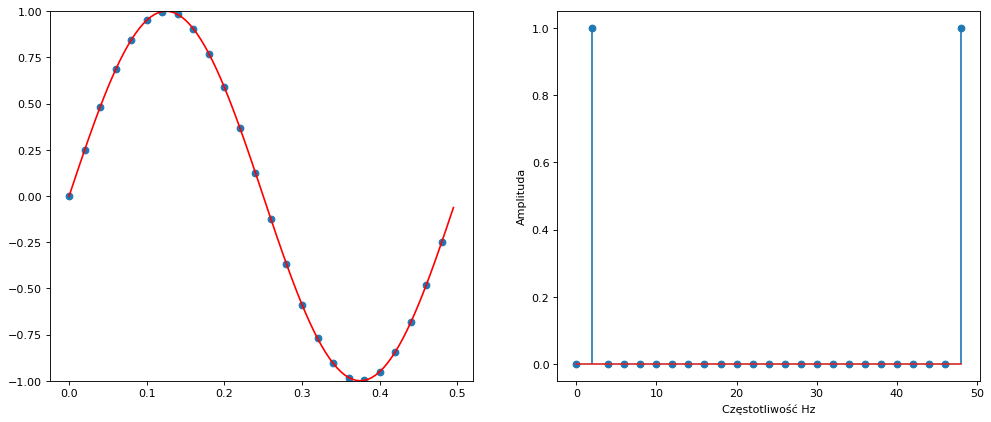

In [3]:
plot_fft(w=50)

#### c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

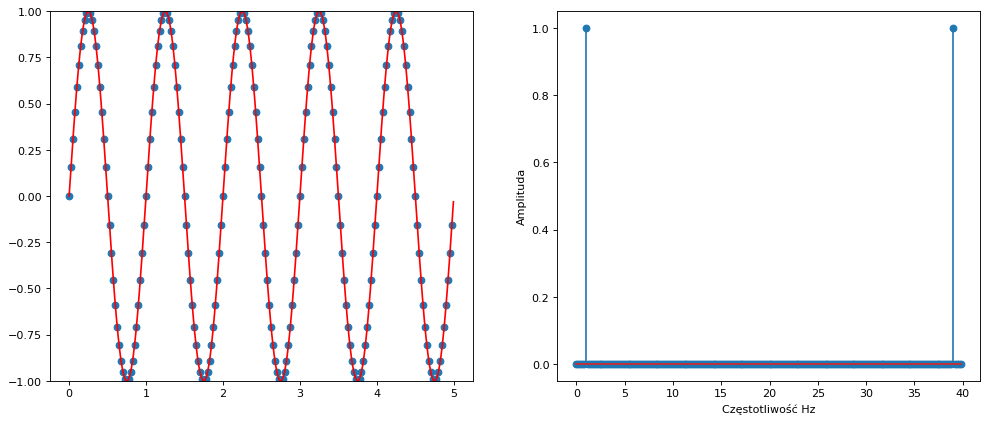

In [4]:
plot_fft(F=1.0, LP=5)

#### d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

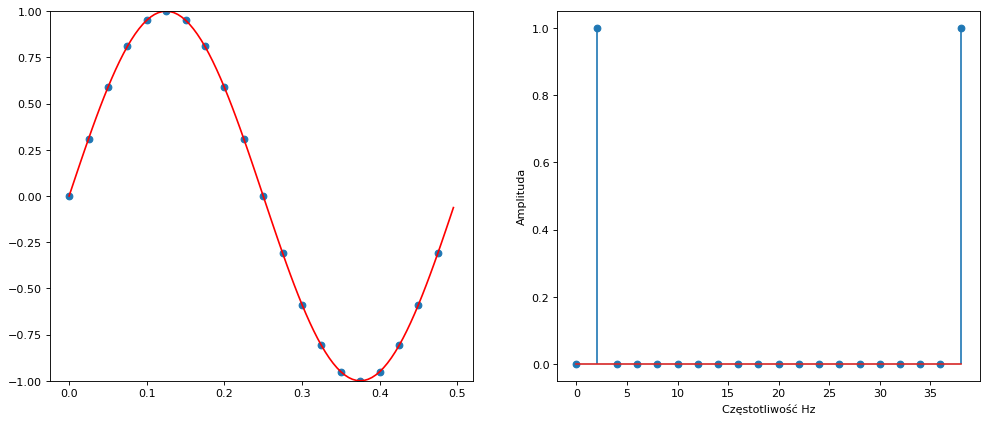

In [5]:
plot_fft()

#### e) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. <font color='red'>Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy</font>? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. <font color='red'>Dlaczego uzyskano taki wynik</font>?

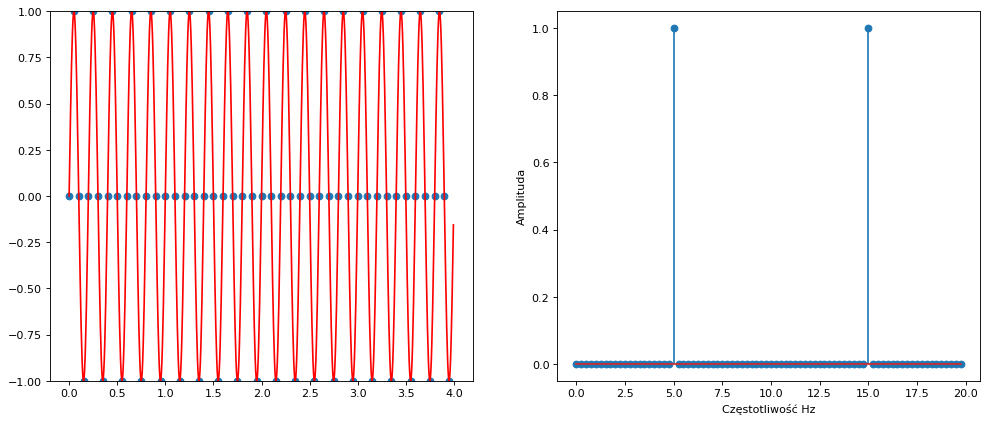

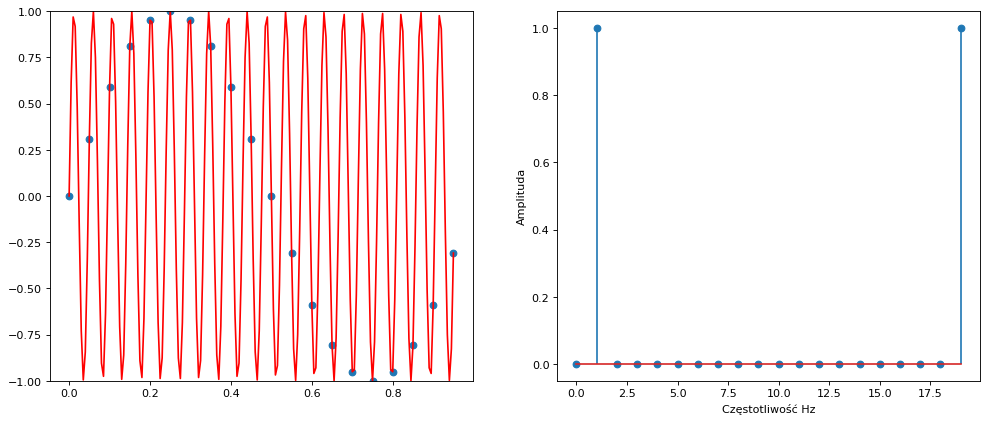

In [6]:
plot_fft(F=5, w=20, LP=20)
plot_fft(F=21, w=20, LP=20)
# W drugim przypadku wartość częstotliwości z FFT należy do przedziału (1Hz, 2Hz) co nie dodaje rzeczywistej częstotliwości analizowanego sygnału. Jest to spowodowane tym, że częstotliwość próbkowania jest niższa od częstotliwości sygnału.

#### f) Porównaj spektrum funkcji $sin(F*2\pi t)$, $2sin(F*2\pi t)$ i $3sin(F*2\pi t)$. <font color='red'>Jak zmienia się wartość na osi OY na wykresie spektrum</font>?

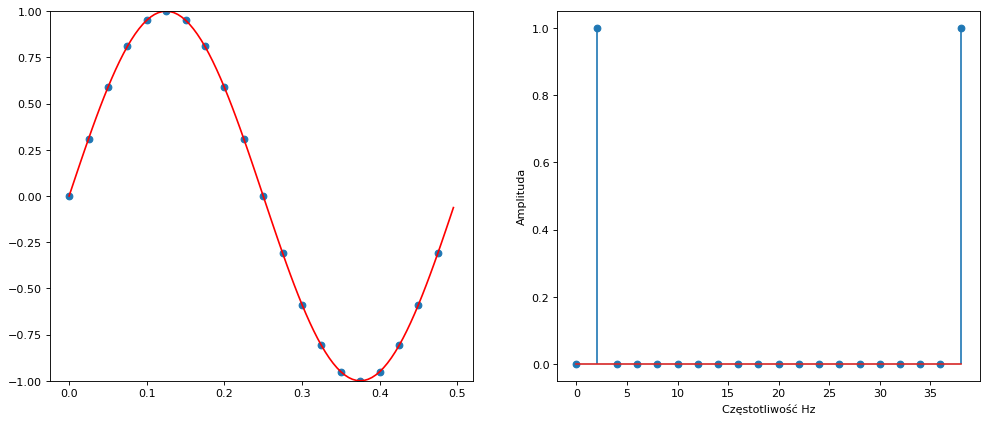

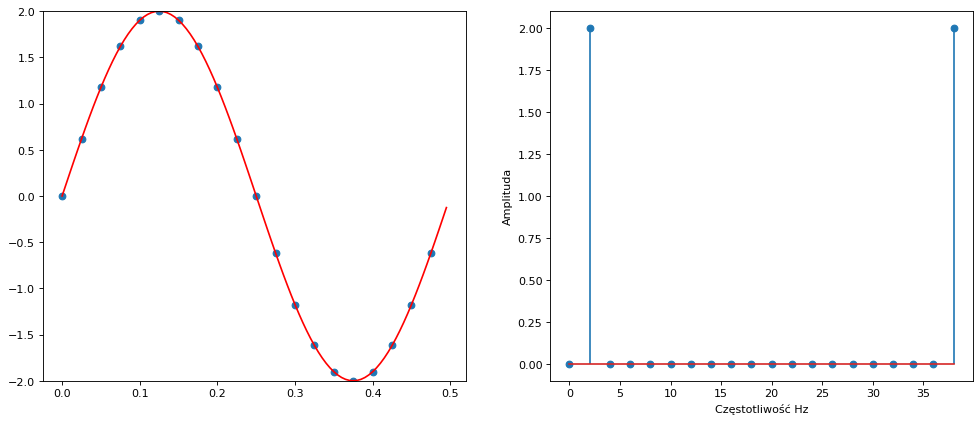

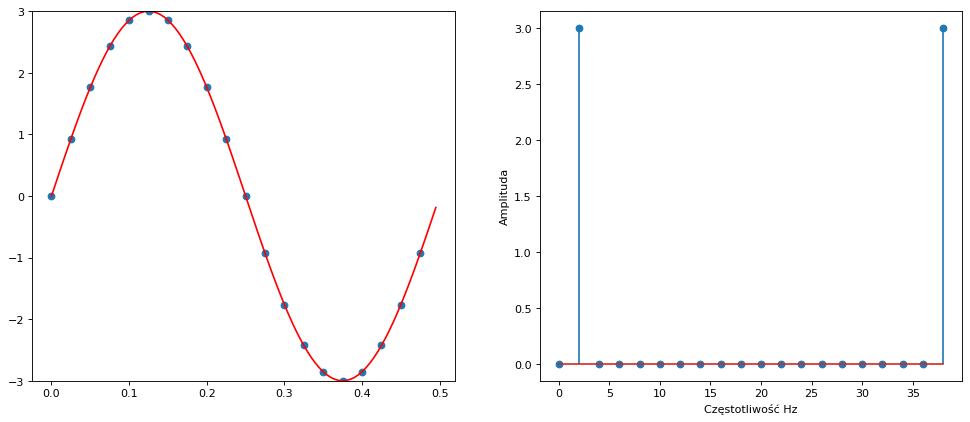

In [7]:
plot_fft(A=1)
plot_fft(A=2)
plot_fft(A=3)
# wartość na osi OY przemnożona jest przez wartość amplitudy sygnału

#### g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, $T=1s$? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(F*2\pi t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

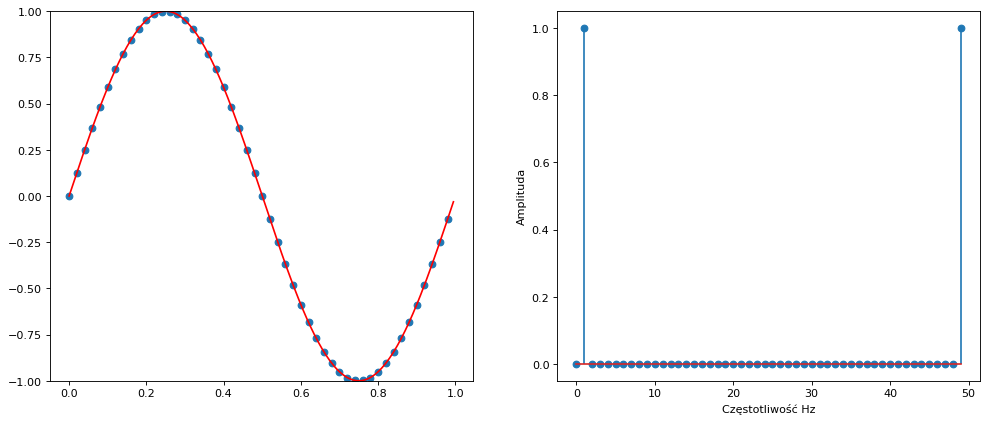

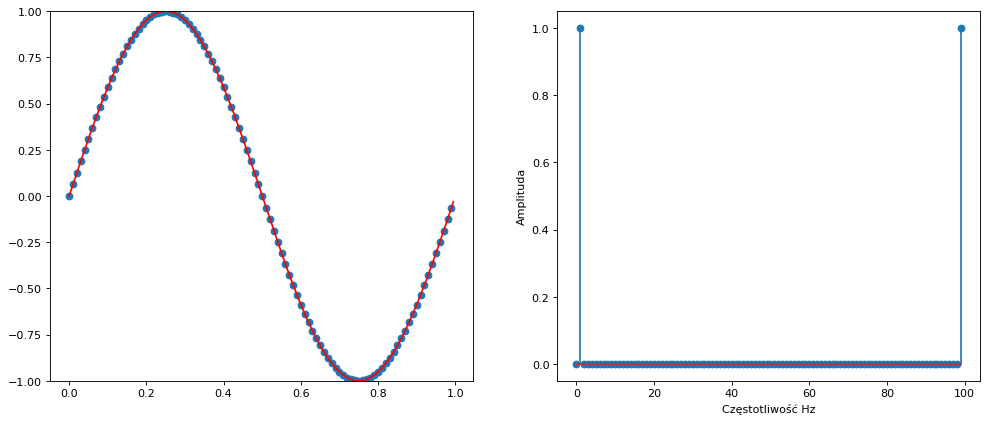

In [8]:
plot_fft(w=50, F=1) # dla tych wartości na wykresach jest 50 punktów
plot_fft(w=100, F=1)
# dla dwuktronie zwiększonej wartości częstotliwości próbkowania wartości na osi OY zwiększyły się dwukrotnie

#### h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji (tu fajnie użyć interact), częstotliwości próbkowania oraz rozważanych liczb punktów. Pamiętaj o wysokim LP.

In [9]:
interact(plot_fft, A=(1, 10, 1), w=(1, 500, 1), LP=(1, 10, 1), F=(1, 10, 1))

interactive(children=(IntSlider(value=1, description='A', max=10, min=1), IntSlider(value=40, description='w',…

<function __main__.plot_fft(A=1, w=40, LP=1, F=2.0)>

## Zadanie 2

#### Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej. Pamiętaj aby przeskalować oś OX na wykresie spektrum. Możesz przyjąć jako rozpatrywany okres rok, wówczas częstotliwość próbkowania będzie wynosiła 12.

<StemContainer object of 3 artists>

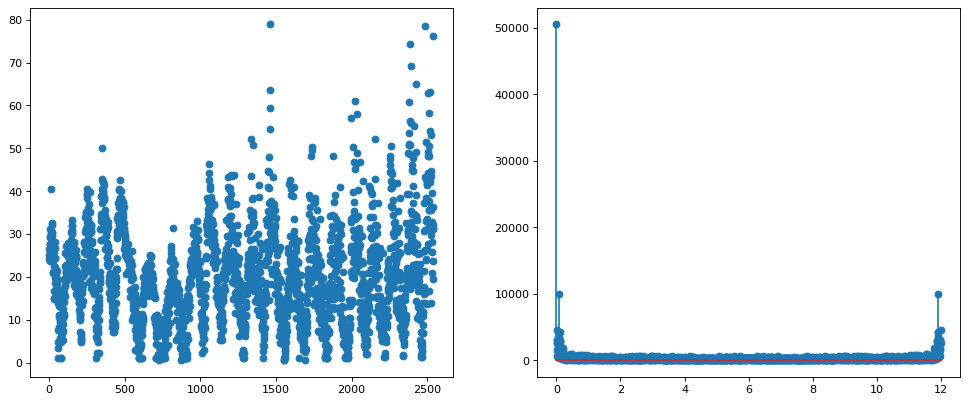

In [11]:
values = []
with open("spots.txt") as f:
    for line in f:
        values.append(float(line))

#--- Probkujemy sygnal
w = 12       # Częstotliwość probkowania [Hz]

n = len(values)                 # Liczba próbek

#--- Rysujemy sygnał (niebieskie kółka)
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_subplot(121)
ax.plot(values, 'o')

#--- Wykonujemy FFT
signal1 = fft.fft(values)
signal1 = abs(signal1) # moduł

#--- Rysujemy FFT
ax = fig.add_subplot(122)
ymax = max(signal1)

freqs = np.linspace(0, w, n, endpoint=False)
stem(freqs, signal1, '-*')


## Zadanie 3

#### Proste filtrowanie. Wykreśl sygnał sin(2*pi*t) + sin(4*pi*t), T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

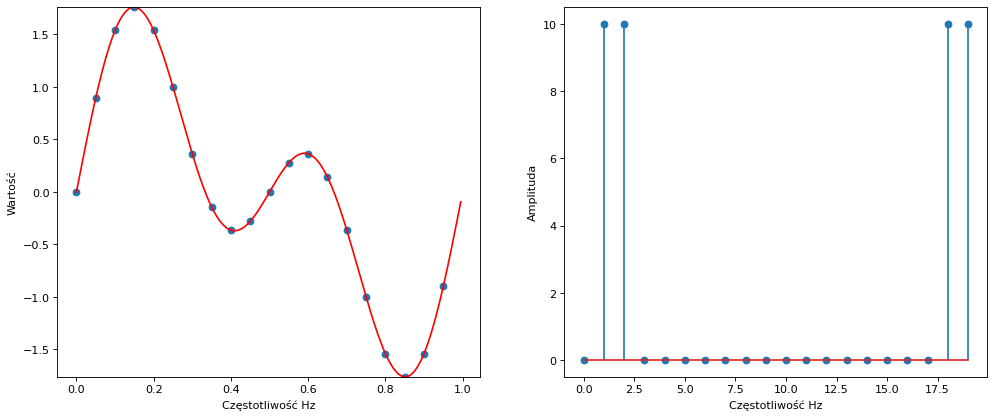

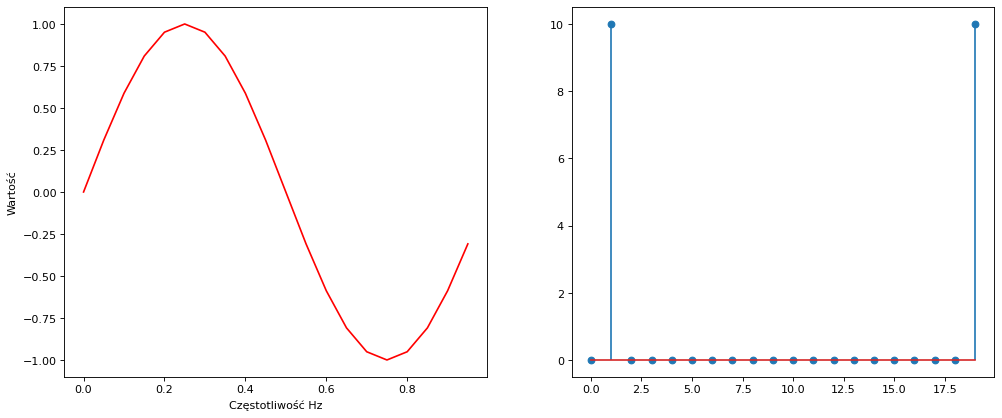

In [35]:
def f(modify=False):
  #--- Definiujemy sygnal wejsciowy
  A = 1        # Amplituda sygnalu
  F = 1.0      # Czestotliwosc sygnalu [Hz]
  T = 1/F      # Okres sygnalu [s]
  f = lambda t : A * np.sin(2*pi*t) + np.sin(4*pi*t)    # Def. analizowanej funkcji (sygnalu)

  #--- Probkujemy sygnal
  LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
  w = 20       # Częstotliwość probkowania [Hz]
  TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

  t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
  n = len(t)                 # Liczba próbek

  signal = f(t)

  #--- Rysujemy sygnał (niebieskie kółka)
  fig = plt.figure(figsize=(15, 6), dpi=80)
  ax = fig.add_subplot(121)

  signal1 = fft.fft(signal)

  plt.xlabel("Częstotliwość Hz")
  plt.ylabel("Wartość")

  freqs = np.linspace(0, w, n, endpoint=False)

  if not modify:
    ax.plot(t, signal, 'o')
    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])

    #--- Wykonujemy FF

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)

    stem(freqs, abs(signal1), '-*');

    plt.xlabel("Częstotliwość Hz")
    plt.ylabel("Amplituda")


  else:
    for i in range(len(freqs)):
      if freqs[i] == 2 or freqs[i] == w-2:
        signal1[i] = 0
    base_t1 = np.fft.ifft(signal1)
    ax.plot(t, base_t1, linestyle='-', color='red')

    ax = fig.add_subplot(122)
    stem(freqs, abs(signal1), '-*');


  plt.show()

f()
f(modify=True)


## Zadanie 4

#### Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości.

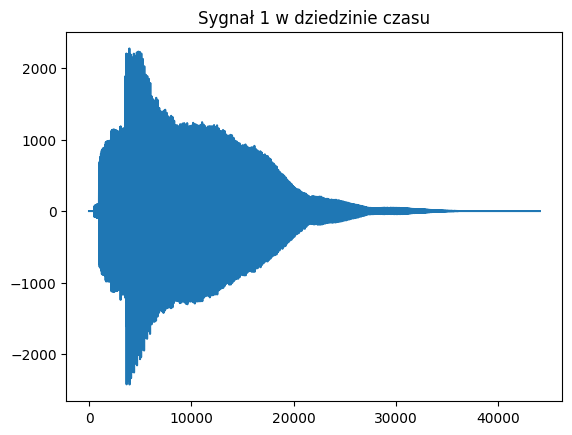

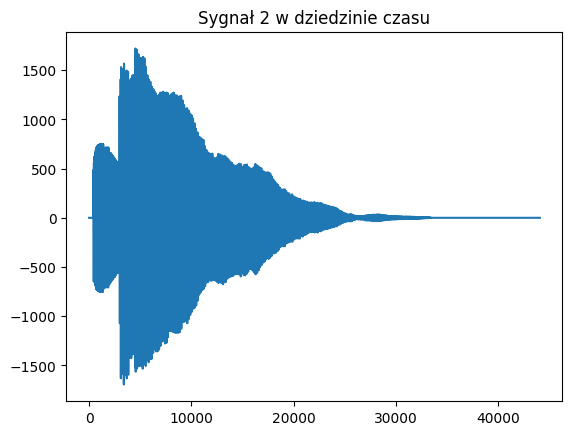

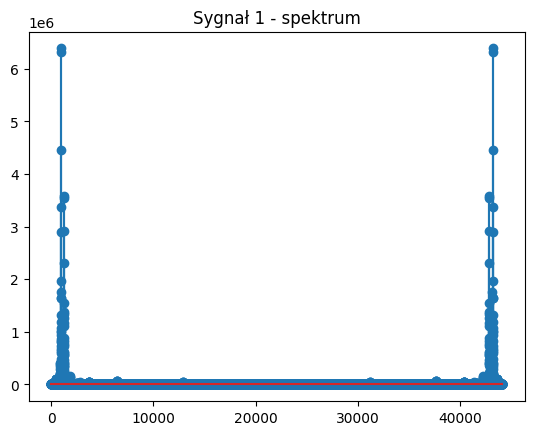

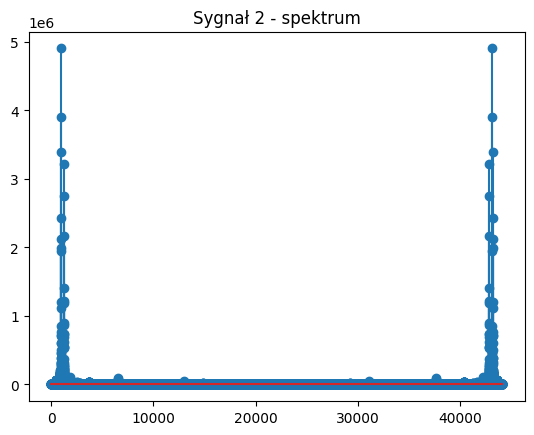

Dominujace czestotliwosci przy sygnale 1:  [  929.72014925   930.74860075   931.77705224   932.80550373
  1242.36940299  1243.39785448 42856.60214552 42857.63059701
 43167.19449627 43168.22294776 43169.25139925 43170.27985075]
Dominujace czestotliwosci przy sygnale 1:  [  934.86240672   935.89085821   936.9193097   1248.54011194
  1249.56856343 42850.43143657 42851.45988806 43163.0806903
 43164.10914179 43165.13759328]


In [65]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

fs, data = wav.read('err.wav')

n = len(data)

time = np.linspace(0, fs, n)

plt.figure()

plt.title('Sygnał 1 w dziedzinie czasu')
plt.plot(time, data[:, 0])
plt.show()

plt.title('Sygnał 2 w dziedzinie czasu')
plt.plot(time, data[:, 1])
plt.show()


freqs = np.linspace(0, fs, n, endpoint=False)

plt.title('Sygnał 1 - spektrum')
fft = np.fft.fft(data[:, 0])
spectrum1 = np.abs(fft)
plt.stem(freqs, spectrum1, ".")
plt.show()

plt.title('Sygnał 2 - spektrum')
fft = np.fft.fft(data[:, 1])
spectrum2 = np.abs(fft)
plt.stem(freqs, spectrum2, ".")
plt.show()

# plt.title('Sygnał 1 - spektrum - skala logarytmiczna')
# plt.stem(freqs, spectrum1, ".")
# plt.xscale("log")
# plt.show()

# plt.title('Sygnał 2 - spektrum - skala logarytmiczna')
# plt.stem(freqs, spectrum2, ".")
# plt.xscale("log")
# plt.show()

half_maxval = max(spectrum1) / 2
dfreqs = freqs[(spectrum1 > half_maxval)]
print("Dominujace czestotliwosci przy sygnale 1: ", dfreqs)

half_maxval = max(spectrum2) / 2
dfreqs = freqs[(spectrum2 > half_maxval)]
print("Dominujace czestotliwosci przy sygnale 2: ", dfreqs)
